In [2]:
# -- necessary setup

import os,sys
sys.path.append(os.path.abspath('../src'))

from IO.RNA_IO import RNA_IO
from utils import parse_pdb_files
from Transformations.transformers.SecondaryStructure import SecondaryStructure

RF00162


In [3]:
X, Y= parse_pdb_files(['7eaf'])

(1, 94, 44, 3)
max_residues: 94, max_atoms: 44


In [1]:
ss1 = SecondaryStructure()
X1, Y1= ss1.transform(X, Y)
print(X1.shape)
print(Y1["Original"].shape)
print("".join(Y1["SecondaryStructure"][0]))

NameError: name 'SecondaryStructure' is not defined

In [4]:
ss2 = SecondaryStructure(nussinov=True)
X2, Y2= ss2.transform(X1, Y1)
print(X2.shape)
print(Y2["Original"].shape)
print("".join(Y2["SecondaryStructure"][0]))
s="".join(Y2["SecondaryStructure"][0])

NameError: name 'X1' is not defined

In [5]:
%pip install viennarna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 322.1 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from viennarna import RNA
import matplotlib.pyplot as plt

#Visualize the structure with RNAplot
fig, ax = plt.subplots()
ax.set_title(f"RNA Secondary Structure: {X}")
RNA.plot(X, X1, ax=ax)
plt.show()

ModuleNotFoundError: No module named 'viennarna'

In [ ]:
fig, ax = plt.subplots()
ax.set_title(f"RNA Secondary Structure: {X}")
RNA.plot(X, X2, ax=ax)
plt.show()

rna_network.html


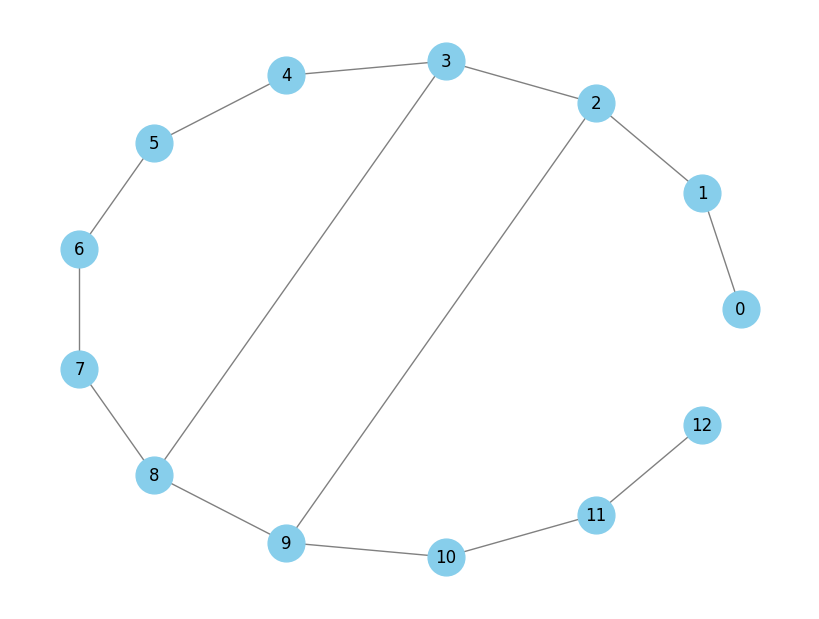

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

def plot_rna_network(dot_bracket, filename="rna_network.html"):
    G = nx.Graph()
    net = Network(height="800px", width="100%", notebook=True)
    stack = []
    base_pairs = []

    for i, char in enumerate(dot_bracket):
        if char == "(":
            stack.append(i)
        elif char == ")":
            start = stack.pop()
            end = i
            base_pairs.append((start, end))
    
    for i in range(len(dot_bracket)):
        G.add_node(i)
        net.add_node(i, label=str(i + 1))
    
    for i in range(len(dot_bracket) - 1):  # Link sequential bases
        G.add_edge(i, i + 1)
        net.add_edge(i, i + 1, color="black")
    
    for pair in base_pairs:  # Link base pairs
        G.add_edge(pair[0], pair[1])
        net.add_edge(pair[0], pair[1], color="red")
    
    net.force_atlas_2based()
    net.show(filename)

    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(G)  # Circular layout for better RNA visualization
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", edge_color="gray")
    plt.show()

dot_bracket = "..((....))..."
plot_rna_network(dot_bracket)
